# Movie Analysis System by AWS 





### Introduction about Dataset
In the ever-evolving landscape of the film industry and digital streaming platforms, understanding audience preferences and trends is paramount. This analysis delves into the realm of movie ratings to uncover valuable insights that can guide decision-making processes for stakeholders across the entertainment spectrum. By examining patterns in user feedback and ratings data, we aim to provide actionable recommendations that empower producers, OTT platforms, and movie enthusiasts alike.

#### Data Dictionary:
- imdb_id:	Unique identifier assigned by IMDb to each movie. 
- title: The title of the movie as listed on IMDb. 
- language:	The primary language in which the movie is spoken. 
- country:	The country or countries where the movie was produced.
- adult:	A binary indicator that specifies whether the movie contains adult content.
- genres:	The genre or genres to which the movie belongs. 
- budget:	The budget allocated for producing the movie, typically expressed in the currency of the country where the movie was produced.
- revenue:	The total revenue generated by the movie, usually measured in the same currency as the budget. 
- release_date:	The date when the movie was officially released to the public.
- runtime:	The duration of the movie in minutes.
- popularity:	A metric indicating the popularity of the movie, often based on factors such as box office performance, online views, and social media buzz.
- avg_rating:	The average rating of the movie based on user reviews or critic scores. 
- people_rated:	The number of individuals who have rated or reviewed the movie.
  
#### Problem faced by film Industry
A challenge faced by the film industry and streaming platforms regarding data management. The issues include difficulties in storing historical data, analyzing it to determine trends such as the most popular genres, and accessing this information when needed. 
This impacts the ability to make informed decisions based on past performance and viewer preferences, which is critical for strategic planning and decision-making in a rapidly evolving entertainment market.


#### The code block below loads two datasets related to movies and ratings into Pandas DataFrames using pd.read_csv() function with specific URL paths.This code snippet succinctly loads two datasets into DataFrames (df, ratings_df, and user_df) by directly reading CSV files from specific URLs hosted on GitHub.


In [1]:
#Import all libraries that will be used
import pandas as pd
import numpy as np

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#load the movies and ratings file into the dataframe
movies_ratings_df = pd.read_csv('https://raw.githubusercontent.com/nikkirastogi/ia_final_project/main/2_Data_Merging_AWS_Lambda_to_s3/final_movie_dataset.csv')


In [5]:
movies_ratings_df.head()

imdb_id                        title language country  adult  \
0  tt0114709                    Toy Story       en  ['US']  False   
1  tt0113041  Father of the Bride Part II       en  ['US']  False   
2  tt0113189                    GoldenEye       en  ['GB']  False   
3  tt0112896  Dracula: Dead and Loving It       en  ['US']  False   
4  tt0112453                        Balto       en  ['US']  False   

                                        genres    budget    revenue  \
0  Adventure|Animation|Children|Comedy|Fantasy  30000000  394436586   
1                                       Comedy         0   76594107   
2                    Action|Adventure|Thriller  58000000  352200000   
3                                Comedy|Horror  30000000   10772144   
4                 Adventure|Animation|Children  31000000   11348324   

  release_date  runtime  popularity  avg_rating  people_rated  
0   1995-10-30       81     222.972       7.973         17821  
1   1995-12-08      106      29.885       6.300           704  
2   1995-11-16      130      61.240       6.900          3703  
3   1995-12-22       88      36.808       6.070           938  
4   1995-12-22       78      32.394       7.297          1974

Dataset columns are jumbled thats why it is little bit difficult to read.
Next Step, I will perform Data Preprocessing.

### DATA PREPROCESSING

Data processing occurs when data is collected and translated into usable information.
It is important for data processing to be done correctly as not to negatively affect the analysis.

Initially, I will rearrange the columns,
then delete some columns which will not help in analysis.
After that rename some column as per easy to understand.

In [6]:
movies_ratings_df.shape


(5449, 13)

### Data Summary
In this dataset, 8 numerical and 6 categorical Varibles are there.

In [7]:
movies_ratings_df.dtypes

imdb_id          object
title            object
language         object
country          object
adult              bool
genres           object
budget            int64
revenue           int64
release_date     object
runtime           int64
popularity      float64
avg_rating      float64
people_rated      int64
dtype: object

In [8]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       5448 non-null   object 
 1   title         5449 non-null   object 
 2   language      5449 non-null   object 
 3   country       5449 non-null   object 
 4   adult         5449 non-null   bool   
 5   genres        5449 non-null   object 
 6   budget        5449 non-null   int64  
 7   revenue       5449 non-null   int64  
 8   release_date  5447 non-null   object 
 9   runtime       5449 non-null   int64  
 10  popularity    5449 non-null   float64
 11  avg_rating    5449 non-null   float64
 12  people_rated  5449 non-null   int64  
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 516.3+ KB


In [9]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in movies_ratings_df.columns:
        print(column_name, ": ", get_var_category(movies_ratings_df[column_name]))

In [10]:
print_categories(movies_ratings_df)

imdb_id :  Text (Unique)
title :  Categorical
language :  Categorical
country :  Categorical
adult :  Numerical
genres :  Categorical
budget :  Numerical
revenue :  Numerical
release_date :  Categorical
runtime :  Numerical
popularity :  Numerical
avg_rating :  Numerical
people_rated :  Numerical


In [11]:
movies_ratings_df.shape

(5449, 13)

In [12]:
holder = [] #record holder
# loop through non numerical columns
for I in movies_ratings_df.select_dtypes(exclude =['int64','float64']).columns:
    rec = [] # initialize empty list
    rec.append(I) #column name
    rec.append(movies_ratings_df[I].nunique()) # numer of unique values
    rec.append(movies_ratings_df[I].value_counts().index[0]) #modal value
    rec.append(movies_ratings_df[I].value_counts()[0]) # count of modal value
    holder.append(rec) #add record to larger array
    
#list to data frame
columns = ['Column','number of unique values','most popular column','count']    
 
df_new = pd.DataFrame(data=holder,columns=columns)
df_new

Column  number of unique values   most popular column  count
0       imdb_id                     5448             tt0114709      1
1         title                     5167  The Three Musketeers      4
2      language                       31                    en   4929
3       country                      224                ['US']   3775
4         adult                        1                 False   5449
5        genres                      662                 Drama    555
6  release_date                     4025            2019-09-12      6

In [13]:
numerical_col= []
# loop through non numerical columns
for I in movies_ratings_df.select_dtypes(include =['int64','float64']).columns:
    rec = [] # initialize empty list
    rec.append(I) #column name
    rec.append(movies_ratings_df[I].mean()) # find mean
    rec.append(movies_ratings_df[I].std()) # find standard deviation

    numerical_col.append(rec) #add record to larger array
    
#list to data frame
columns = ['Column Name','mean','std_div']    
 
numerical_df = pd.DataFrame(data=numerical_col,columns=columns)
numerical_df

Column Name          mean       std_div
0        budget  2.538127e+07  3.993144e+07
1       revenue  7.497322e+07  1.615210e+08
2       runtime  1.061776e+02  2.272656e+01
3    popularity  4.918406e+01  4.675548e+01
4    avg_rating  6.467344e+00  8.586086e-01
5  people_rated  2.020845e+03  3.303357e+03

### Descriptive Statistics

In [14]:
length = len(movies_ratings_df["popularity"])
print(length)

5449


In [15]:
count = movies_ratings_df["popularity"].count()
print(count)

5449


In [16]:
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

0.0%


In [17]:
print("Minimum value: ", movies_ratings_df["popularity"].min())
print("Maximum value: ", movies_ratings_df["popularity"].max())

Minimum value:  17.332
Maximum value:  625.791


### Mean, Mode and Median

In [18]:
movies_ratings_df["popularity"].mean()

49.18406404844925

In [19]:
movies_ratings_df["popularity"].mode()

0    29.612
Name: popularity, dtype: float64

In [20]:
movies_ratings_df["popularity"].median()

34.488

In [21]:
movies_ratings_df["popularity"].std()

46.75548020869071

In [22]:
quantile = movies_ratings_df["popularity"].quantile([.25, .5, .75])
quantile

0.25    28.417
0.50    34.488
0.75    48.952
Name: popularity, dtype: float64

### Distribution Plots

#### Does the status of a movie during its production cycle influence its popularity among audiences?

This research question aims to investigate whether there is a correlation between the status of a movie (such as Released, Post Production, etc.) and its average popularity. By analyzing the average popularity of movies grouped by their status, we can gain insights into whether certain stages of a movie's production cycle tend to generate more interest and engagement from audiences.

The y-axis shows average popularity, while the x-axis shows the different stages a movie or TV show can be in, from canceled to rumored.
The most popular status is “Released”, with an average popularity of 3.0.
The least popular statuses are “Canceled” and “Rumored”, both with an average popularity of 2.0.

There is a generally positive correlation between the stage a movie or TV show is in and its average popularity. This means that movies and TV shows tend to become more popular as they progress through the production process.

In [23]:
movies_ratings_df[["popularity", "avg_rating","runtime"]].corr()

popularity  avg_rating   runtime
popularity    1.000000    0.176725  0.149180
avg_rating    0.176725    1.000000  0.315131
runtime       0.149180    0.315131  1.000000

obervation: correlation is very less so all three columns are not related to each other.

Below graphs will help visualize the relationship between popularity and average rating.
Most of popular movie have rating above average.
Most of movies popularity lies under 100.

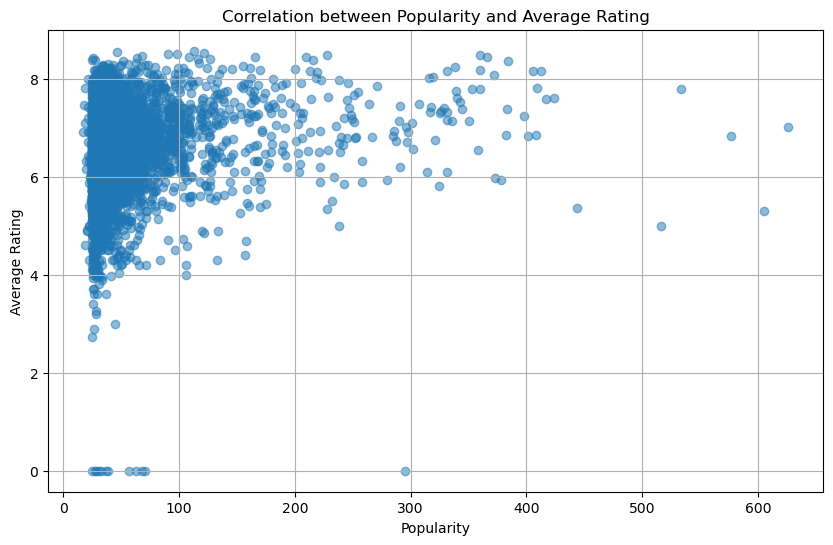

In [24]:
import matplotlib.pyplot as plt

# Plotting the correlation between popularity and average rating
plt.figure(figsize=(10, 6))
plt.scatter(movies_ratings_df['popularity'], movies_ratings_df['avg_rating'], alpha=0.5)
plt.title('Correlation between Popularity and Average Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


### How does average rating distributed across movies?

Text(0.5, 1.0, 'Histogram For Movie Rating')

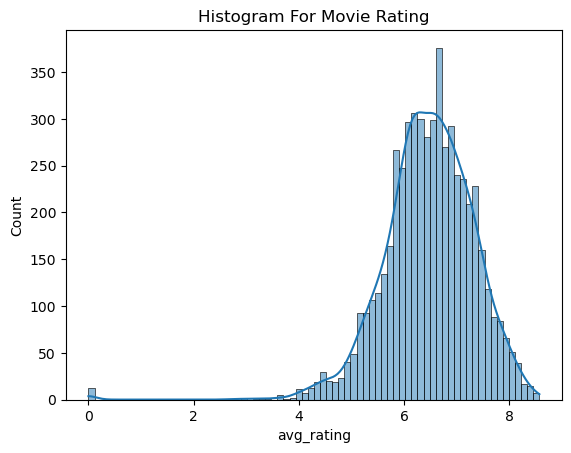

In [25]:
import seaborn as sns

#Defining histogram for Numerical Variable
sns.histplot(data = movies_ratings_df, x = 'avg_rating',kde = True)
plt.title('Histogram For Movie Rating')


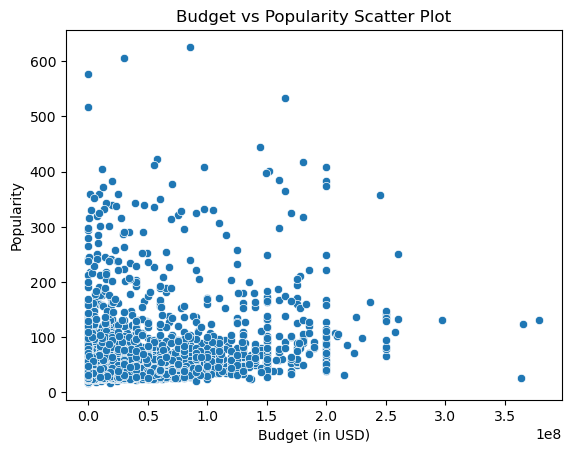

In [26]:

# Creating a scatter plot for budget vs popularity
sns.scatterplot(data=movies_ratings_df, x='budget', y='popularity')
plt.title('Budget vs Popularity Scatter Plot')
plt.xlabel('Budget (in USD)')
plt.ylabel('Popularity')
plt.show()


## Profiling Libraries

There is libraries that exist that perform all of the data crunching for you. They output a very clear profile of your data. pandas-profiling is one of them. That library offers out-of-the-box statistical profiling of your dataset. Since the dataset we are using is tidy and standardized, we can use the library right away on our dataset.




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

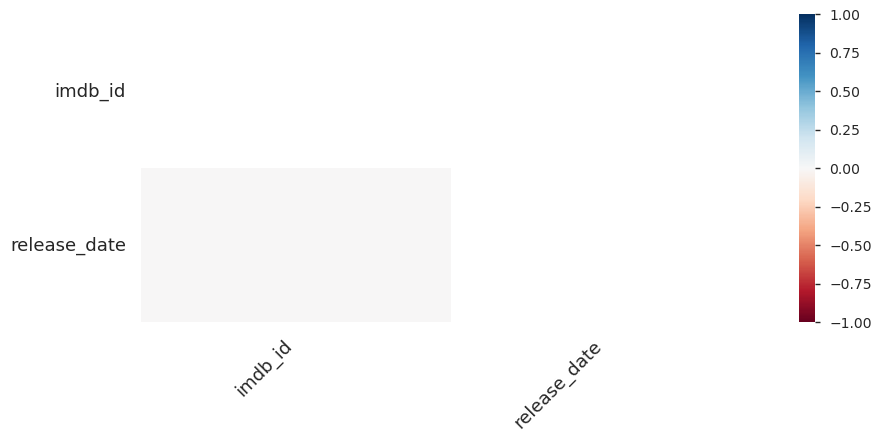

In [27]:
import ydata_profiling 

ydata_profiling.ProfileReport(movies_ratings_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

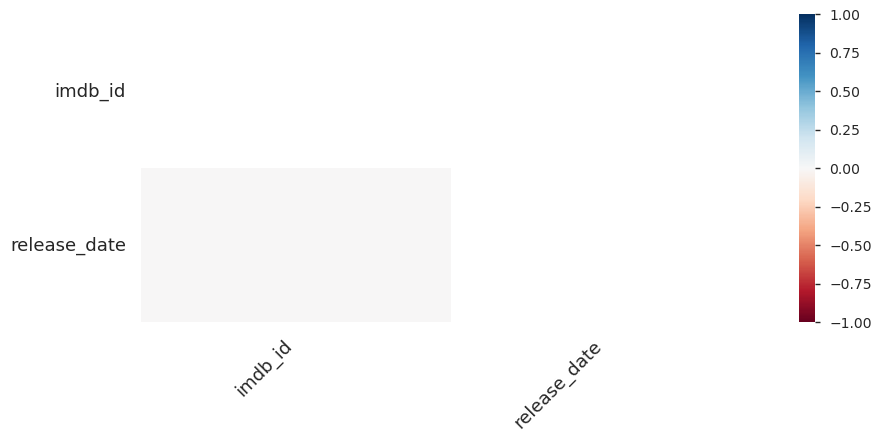

In [35]:
ydata_profiling.ProfileReport(movies_ratings_df).to_file("report.html")  # This will save the report as an HTML file locally
